# FSK test
- https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-modulation/digital-modulation-amplitude-and-frequency/ 

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *
from waves.tools.dsp.mixers.modulators.digital import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))
    plt.xticks(rotation = 45)    

## LO

In [7]:
phase_shift = PI2 / 8

In [8]:
freq_lo = int(1e5)

freq_sampling = freq_lo * 8 * 2

In [9]:
duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

## IF

In [10]:
freq_if = int(1e3)

### QPSK

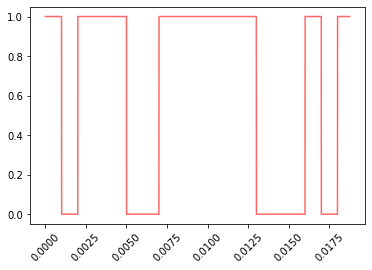

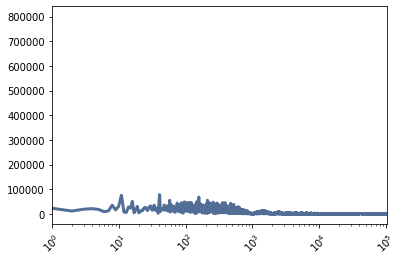

In [11]:
freq_if = 1000

def gen_bitstream(freq, ts):
    bs = np.zeros(ts.shape)
    bs[:] = 1
    n = ts.shape[-1]
    for i in range(1, n):
        if int(freq * ts[i ] ) > int(freq * ts[i -1] ) :
            bs[i] = random.choice((0, 1))
        else :
            bs[i] = bs[i-1]
    return bs

# show_frames = 3000
# amp = FrequencyMixer(freq_if, np.cos).gen_channel(t)
# amp.show(color = 'red', show_frames = slice(0, show_frames))

show_frames = 3000
show_frames_if = 30000
amp = Channel(gen_bitstream(freq_if, t), ts = t, framerate = freq_sampling)
amp.show(color = 'red', show_frames = slice(0, show_frames_if))
 
plt.xticks(rotation = 45);
plt.figure()
amp.make_spectrum().plot(freq_lims = (1, freq_lo + freq_if * 2))
plt.xticks(rotation = 45);

## Modulation

In [12]:
fsk = FSK(freq = freq_lo, freq_offset = freq_if)# , fun = np.cos,)

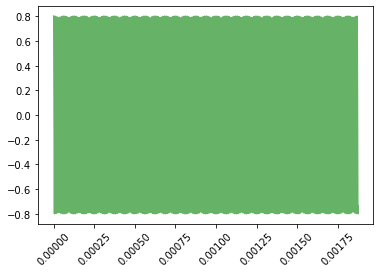

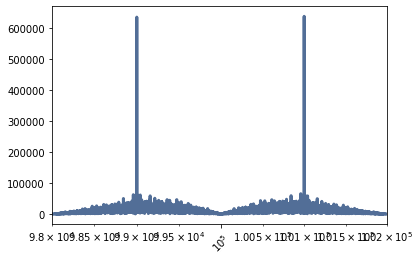

In [13]:
RF = fsk.modulate(amp, modulation_index = 0.8)

RF.show(color = 'green', show_frames = slice(0, show_frames))
# amp.show(color = 'green', show_frames = slice(0, show_frames))
plt.xticks(rotation = 45);

plt.figure()
RF.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2 , freq_lo + freq_if * 2))
# RF.make_spectrum().plot(freq_lims = (1, freq_sampling))
plt.xticks(rotation = 45);

## De-modulation

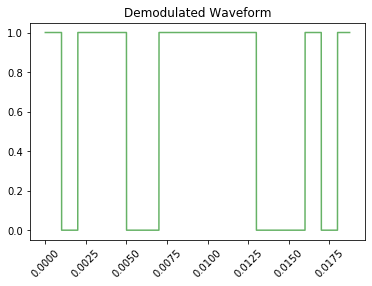

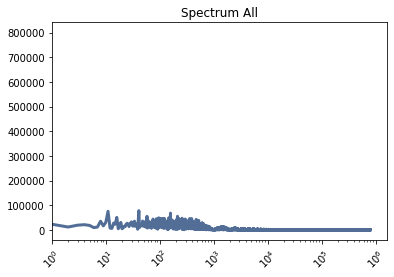

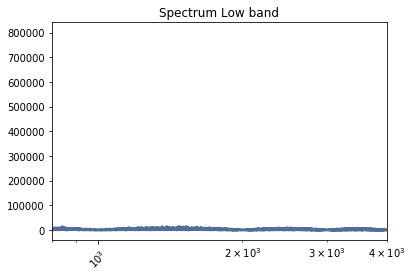

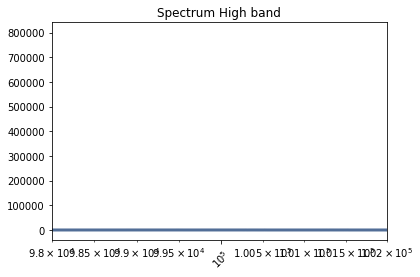

In [14]:
amp_restored = fsk.demodulate(RF)#, low_pass_cutoff = freq_lo*3) 

amp_restored.show(color = 'green', show_frames = slice(0, show_frames_if))
# amp_restored.show(color = 'green', show_frames = slice(0, show_frames))
plt.title('Demodulated Waveform')
plt.xticks(rotation = 45);

plt.figure()
plt.title('Spectrum All')
amp_restored.make_spectrum().plot(freq_lims = (1, freq_sampling)) 
plt.xticks(rotation = 45);

plt.figure()
plt.title('Spectrum Low band')
amp_restored.make_spectrum().plot(freq_lims = (freq_if * 0.8, freq_if * 4))  
plt.xticks(rotation = 45);

plt.figure()  
plt.title('Spectrum High band')
amp_restored.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2, freq_lo + freq_if * 2)) 
# amp_restored.make_spectrum().plot(freq_lims = (1, freq_lo*2)) 
plt.xticks(rotation = 45);  

In [15]:
# plt.figure()
# amp_restored.make_spectrogram(2**12).plot()
# plt.xticks(rotation = 45);

## Validate

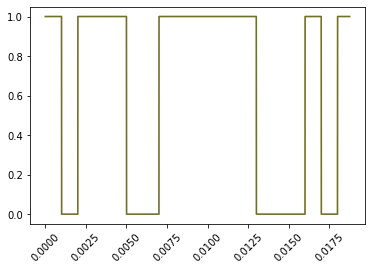

In [16]:
amp.show(color = 'red', show_frames = slice(0, show_frames_if))
# plt.xticks(rotation = 45);
# plt.figure()
amp_restored.show(color = 'green', show_frames = slice(0, show_frames_if))
plt.xticks(rotation = 45);